## Import Library

In [1]:
import pandas as pd
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.callbacks import EarlyStopping
import tensorflow as tf

## Import image for train

In [2]:
train = '/Users/Dataset/CatDog/Train'
categories = ['Dog','Cat']

In [3]:
train_img=[]
img_size = 100
i=0
for category in categories:
    folder_path = os.path.join(train, category)
    label = categories.index(category)
    for img in os.listdir(folder_path):
        try:
            
            img_path = os.path.join(folder_path,img)
            img_arr = cv2.imread(img_path)
            img_arr = cv2.resize(img_arr, (100,100))
            train_img.append([img_arr,label])
        except: 
            continue

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


###### Shuffel the rows of traingn data

In [4]:
random.shuffle(train_img)

###### Splitting features and class of object

In [5]:
X =[]
Y = []
for feature, labels in train_img:
    X.append(feature)
    Y.append(labels)

###### Convert image to numpy array

In [6]:
X= np.array(X)
Y= np.array(Y)

In [7]:
X=X/255

In [8]:
print ("Train (feature) data shape: ",X.shape)
print ("Train (target) data shape: ",Y.shape)

Train (feature) data shape:  (24912, 100, 100, 3)
Train (target) data shape:  (24912,)


## Build Model

In [9]:
from keras.models import Sequential
from keras.layers import *


In [10]:
model = Sequential()

model.add(Conv2D(filters=12, kernel_size=(3,3), activation='relu',input_shape=(100,100,3) ))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(filters=12, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))


model.add(Conv2D(filters=24, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(filters=24, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))


model.add(Flatten())
# model.add(Dense(units=64, activation='relu' ))
# model.add(Dropout(0.2))

model.add(Dense(units=32, activation='relu' ))
model.add(Dropout(0.2))

model.add(Dense(units=2, activation='softmax'))

Metal device set to: Apple M2


###### Model Summery

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 12)        336       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 12)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 12)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 12)        1308      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 12)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 12)        0

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
ess = EarlyStopping(monitor='val_loss', patience=5)

## Train Model

In [14]:
history = model.fit(X,Y, epochs=100, validation_split=0.1, callbacks=[ess])

Epoch 1/100


2023-07-03 07:42:22.003475: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


701/701 [==============================] - 28s 35ms/step - loss: 0.6622 - accuracy: 0.5849 - val_loss: 0.6229 - val_accuracy: 0.6493
Epoch 2/100
701/701 [==============================] - 22s 32ms/step - loss: 0.5918 - accuracy: 0.6844 - val_loss: 0.5938 - val_accuracy: 0.6657
Epoch 3/100
701/701 [==============================] - 23s 33ms/step - loss: 0.5340 - accuracy: 0.7299 - val_loss: 0.4937 - val_accuracy: 0.7661
Epoch 4/100
701/701 [==============================] - 24s 35ms/step - loss: 0.4980 - accuracy: 0.7547 - val_loss: 0.4985 - val_accuracy: 0.7496
Epoch 5/100
701/701 [==============================] - 24s 34ms/step - loss: 0.4780 - accuracy: 0.7699 - val_loss: 0.4285 - val_accuracy: 0.7994
Epoch 6/100
701/701 [==============================] - 23s 33ms/step - loss: 0.4595 - accuracy: 0.7799 - val_loss: 0.5271 - val_accuracy: 0.7103
Epoch 7/100
701/701 [==============================] - 22s 31ms/step - loss: 0.4484 - accuracy: 0.7886 - val_loss: 0.4756 - val_accuracy: 0.75

###### Compare Result

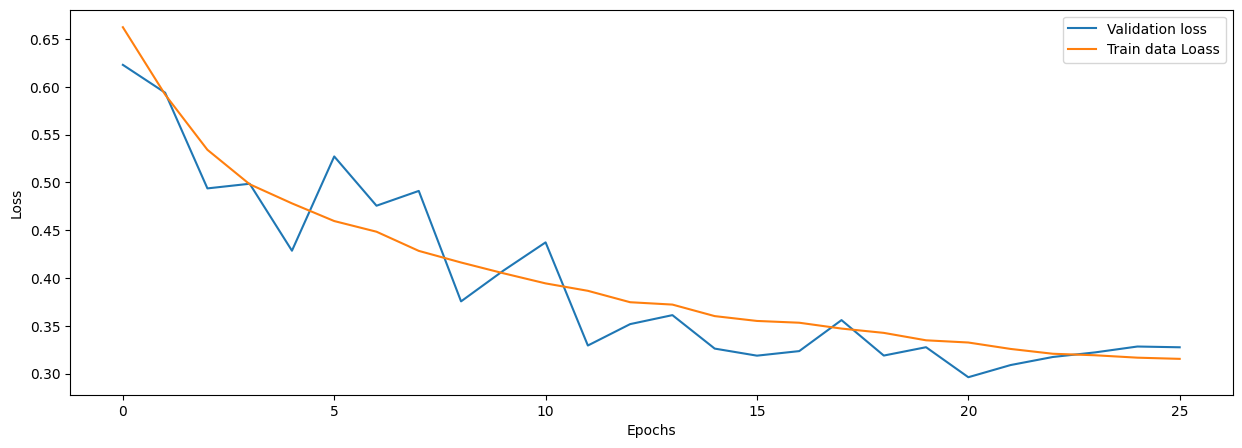

In [15]:
plt.figure(figsize=(15,5))
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['loss'], label='Train data Loass')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

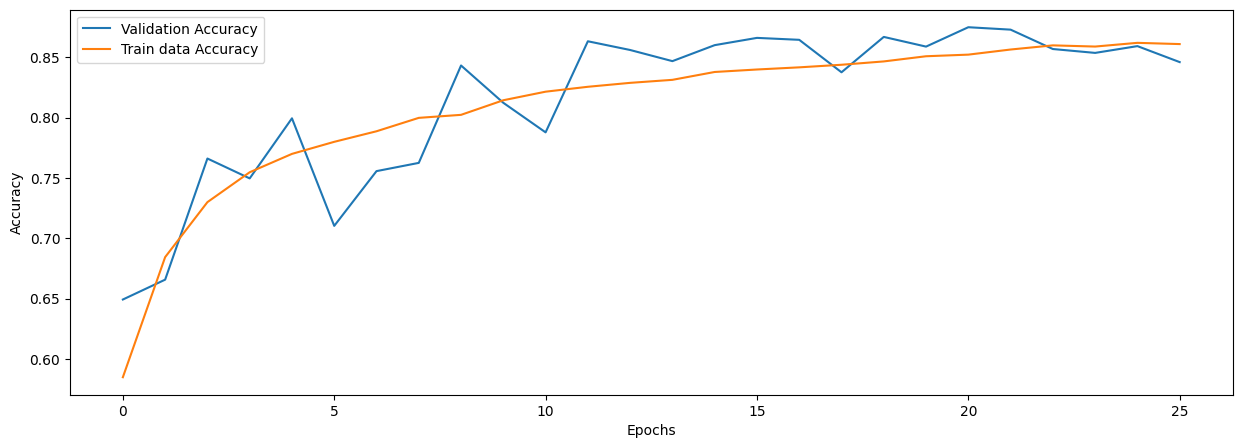

In [16]:
plt.figure(figsize=(15,5))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Train data Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Import testing images

In [17]:
test_path = '/Users/Dataset/CatDog/Test'
test_categoryes = ['Dog', 'Cat']
test = []
for category in categories:
    fol_path = os.path.join(test_path, category)
    lab = categories.index(category)
    for img in os.listdir(fol_path):
        try:
            image_path = os.path.join(fol_path,img)
            img = cv2.imread(image_path)
            img = cv2.resize(img, (100,100))
            test.append([img, lab])
            
        except:
            continue
        
        

libpng warning: iCCP: known incorrect sRGB profile


In [18]:
random.shuffle(test)

In [19]:
x_test=[]
y_test=[]
for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

In [20]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [21]:
y_pred = model.predict(x_test)

11/11 [==============================] - 1s 48ms/step


In [22]:
pred = np.argmax(y_pred, axis=1)

In [23]:
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [24]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,

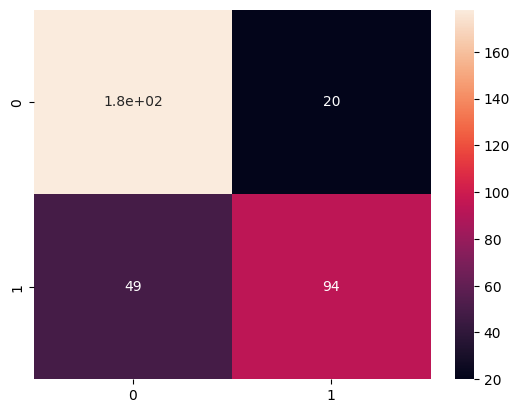

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
sns.heatmap(confusion_matrix(pred, y_test), annot=True);

In [26]:
accuracy_score(y_test, pred)

0.7976539589442815